# First Data Exploration

Different from what a linear sketch of a data science workflow might sometimes suggest, it is generally not at a single moment that we inspect our data. Instead, we inspect our data frequently, with varying focus and depths.
In the previous sections we already saw that the collection and technical handling (e.g., importing) of the data already includes a certain degree of data inspections. Then, during data cleaning we had to have a closer look at that is in the data and what might be missing. Now, we want to take a next step, which often done by doing basic statistics and other quick data explorations. A good data exploration phase is like getting a quick snapshot of the data's characteristics, anomalies, patterns, and relationships. This foundational step often happens immediately after or even during the data acquisition and cleaning phases.

## Statistical Measures

A comprehensive understanding of the data often starts with basic statistical measures. These measures provide concise summaries, allowing data scientists to grasp the main tendencies and dispersions in the dataset. Many of you will probably (or hopefully?) know many of the measures that are listed in this chapter and the core focus here will be to give a quick refresher. For those of you that feel lost when it comes to basic statistics it would make sense to invest time to gain a more solid foundation into those basics. There are many books, tutorials and courses on this matter, for instance  also the [w3schools website](https://www.w3schools.com/statistics/index.php).

1. **Measures of Central Tendency**: These are quintessential in understanding where the 'center' of our data lies.

   - **Mean (Arithmetic Mean)**: The arithmetic mean is calculated as the sum of all values divided by the number of values. It's a common measure to determine the central value in a dataset. Mathematically, if $X$ is a dataset with $n$ values, the mean $\mu$ is calculated as:

     $$\mu=\frac{1}{n}\sum_{i=1}^n x_i$$

   - **Median**: The median is the middle value of an ordered dataset, separating the higher half from the lower half. If the dataset has an odd number of observations, the median is the middle number. If there's an even number, it's the average of the two middle numbers.

   - **Mode**: Represents the value that appears most frequently in a dataset. Datasets can have one mode, more than one mode, or no mode at all.

2. **Quantiles**: They segment the data into intervals which encompass equal probabilities.

   - **Median**: Also known as the 0.5-Quantile, representing the 50th percentile.
   - **Deciles**: Segments the data into 10 equal parts, marking every 10th percentile.
   - **Percentiles**: Denotes specific positions in a data set, which is divided into 100 equal parts.

3. **Measures of Spread**: While central tendency gives an overview of the data's central point, measures of spread describe how much the data tends to deviate from that point.

   - **Standard Deviation (STD)**: It quantifies the amount of variation in the dataset. A low standard deviation means that values are close to the mean, while a high standard deviation indicates that values are spread out over a wider range.

     $$\sigma=\frac{1}{n}\sum_{i=1}^n (x_i−\mu)^2$$

   - **Interquartile Range**: Represents the range between the first (25th percentile) and third quartiles (75th percentile).
   - **Range**: It’s the simplest measure of spread and is calculated as the difference between the maximum and minimum values in the dataset.
   - **Variance**: The average of the squared differences from the mean, often denoted as σ2σ2.

### Exercise: Understanding Statistics in a Practical Scenario

Consider the 3rd semester of Media Informatics: The average age (mean) of the students = 22.7 years Standard Deviation (STD) = 2.1 years

Questions:

1. Given the mean and standard deviation, is it probable for there to be students in the 3rd semester of Media Informatics who are older than 40 years?
2. Based on the mean and standard deviation, what would be the estimated minimum and maximum age of the students?
3. Based on the mean, are most of the students above or below 22.7 years of age?

Below is a quick summary of the measures discussed:

| Measures                   | Description                                                  | Nominal | Ordinal | Quantitative | Accounts for All Values | Sensitive to Outliers |
| -------------------------- | ------------------------------------------------------------ | :-----: | :-----: | :----------: | :---------------------: | :-------------------: |
| **Mode**                   | Most frequent value                                          |    x    |    x    |      x       |                         |                       |
| **Median**                 | Central value with equal numbers of data points above and below |         |    x    |      x       |                         |                       |
| **Mean (Arithmetic Mean)** | Average value                                                |         |         |      x       |            x            |           x           |
| **Geometric Mean**         | Average of growth rates; multiplicatively linked             |         |         |      x       |            x            |           x           |
| **Harmonic Mean**          | Average of fractions with a constant denominator or a special case of weighted arithmetic mean |         |         |      x       |            x            |           x           |
| **Quantile / Quartile**    | Value below which a specified percentage of observations fall |         |         |      x       |                         |                       |
| **Minimum / Maximum**      | Smallest and largest values respectively                     |         |    x    |      x       |                         |           x           |



## Statistical Measures and Distributions

Let us look at some distributions and their statistical measures. In the following Python code cells we will import the required libraries and define a simple plotting function for the task.

In [1]:
import os

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import squarify
import seaborn as sb

In [2]:
# define a simple plotting function
def plot_dist(data, bins=30, add=["mean"], figsize=(8, 6)):
    def add_stat(value, height, name):
        ax.axvline(value, color="crimson")
        ax.text(1.05 * value, height, name, color="crimson")
    fig, ax = plt.subplots(figsize=figsize)
    a, b, _ = ax.hist(data, bins=bins, rwidth=0.8)
    if "mean" in add:
        value = np.mean(data)
        add_stat(value, 0.9 * np.max(a), f"mean: {value:.2f}")
    if "median" in add:
        value = np.median(data)
        add_stat(value, np.max(a), f"median: {value:.2f}")

### Symmetric Distribution

Symmetric distributions are those where values are distributed in a way that the shape on one side of the centerline mirrors the shape on the other. In other words, the left half of the distribution is a mirror image of the right half. One of the key properties of a symmetric distribution is that the mean and median will be the same, or very close.

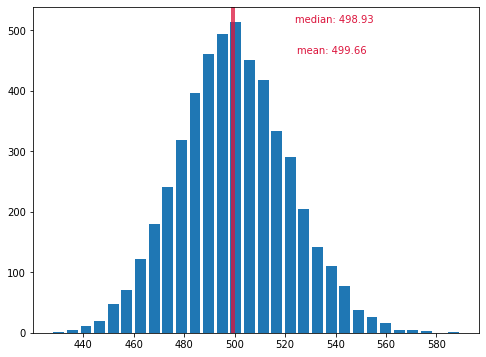

In [3]:
np.random.seed(0)
data = np.random.gamma(500, 1, 5000)
plot_dist(data, 30, ["mean", "median"])

### Non-symmetric Distributions

In reality, most of the data we encounter tends to be non-symmetric. These distributions don't exhibit mirror-like symmetry around their center. It is important to note here, especially for non-symmetric distributions, the mean might not necessarily represent the "center" of the data.

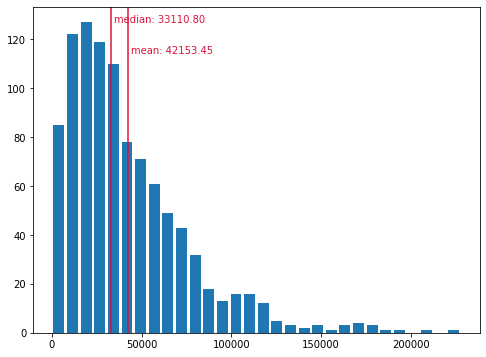

In [4]:
data = np.random.gamma(1.6, 26000, 1000)
plot_dist(data, 30, ["mean", "median"])

### Distributions with Outliers

Outliers are values that stand apart from the bulk of the data. Their presence can distort our perceptions about the data and can notably skew our mean. It's essential to identify and manage outliers for better statistical interpretations.

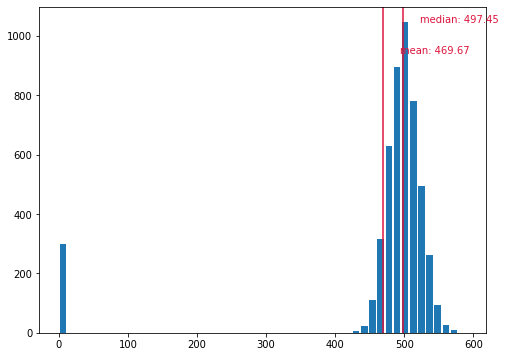

In [5]:
np.random.seed(0)
data = np.random.gamma(500, 1, 5000)
data[:300] = 0
plot_dist(data, 50, ["mean", "median"])

If you look at the distribution plot with the median and the mean: Which of the two measures is better in this case (and why)?

### Mixed Distributions

At times, our dataset may not belong to a single type of distribution. Instead, it may be the result of a mix of two or more underlying distributions. This phenomenon is observed in mixed distributions. Recognizing and understanding the different underlying distributions can be crucial for analysis.

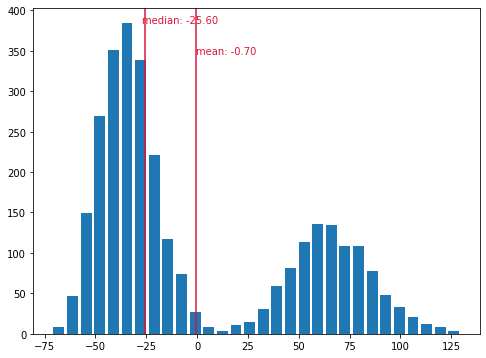

In [6]:
np.random.seed(0)
data1 = np.random.gamma(50, 2, 2000)
data2 = np.random.gamma(100, 2, 1000)
data = np.concatenate((data1, data2)) - 134

plot_dist(data, 30, ["mean", "median"])

Here again: If you look at the distribution plot with the median and the mean, which of the two measures is better in this case (and why)?

### Statistical Measures

After observing the distributions, let's also calculate key statistical measures and see what insights they provide regarding the distribution's characteristics.

In [7]:
print(np.std(data))
print(np.min(data), np.max(data))
print(np.quantile(data, 0.5))
print(np.quantile(data, 0.9))
print(np.percentile(data, [25 ,75]))

50.09713754299179
-71.30263005114779 129.6311878602093
-25.604183317689994
76.81243703053997
[-39.37861049  52.79716049]


## Statistical dispertion

Statistical dispersion refers to the spread or variability of a dataset. It helps to understand the extent to which individual data points deviate from the mean. While two distributions might have similar centers (mean or median), their characteristics could differ considerably in terms of spread. For instance, one might be tightly clustered around the mean, whereas the other might be more spread out.

Dispersion can be illustrated with two distributions that have the same center (mean) but different standard deviations. In the following examples, both distributions are centered at 100, but they have standard deviations of 15 and 1.5, respectively. The standard deviation (often referred to as "STD") is a measure that tells us how spread out the numbers in a distribution are.

A higher standard deviation indicates that the data points tend to be farther from the mean, while a smaller standard deviation suggests that they are clustered closely around the mean.

(52.0, 148.0)

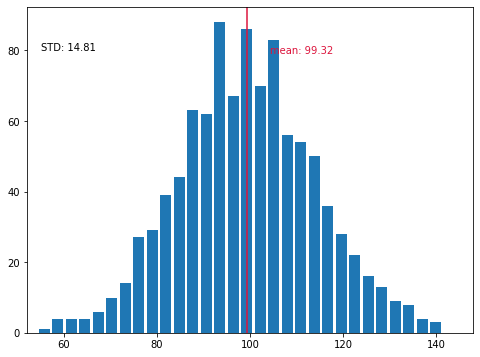

In [8]:
np.random.seed(0)
data = np.random.normal(100, 15, 1000)

plot_dist(data, 30, ["mean"])
plt.text(55, 80, f"STD: {np.std(data):.2f}")
plt.xlim(52, 148)

The plot above showcases a normal distribution with a mean of 100 and a standard deviation of 15. The data points are spread relatively far from the mean, resulting in a wider bell shape.

(52.0, 148.0)

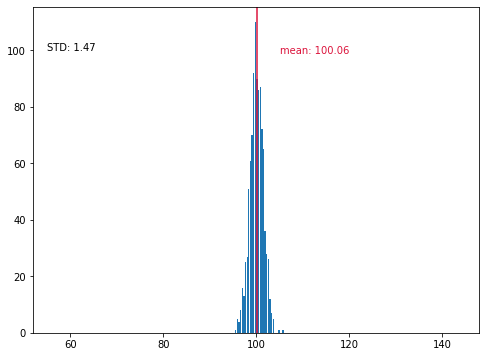

In [9]:
np.random.seed(1)
data = np.random.normal(100, 1.5, 1000)

plot_dist(data, 30, ["mean"])
plt.text(55, 100, f"STD: {np.std(data):.2f}")
plt.xlim(52, 148)

In contrast, the second plot demonstrates a distribution with the same mean of 100 but with a much smaller standard deviation of 1.5. This causes the data to be tightly clustered around the mean, making the bell shape much narrower.

By comparing the two plots, we observe the significance of the standard deviation in understanding the distribution's spread. While both distributions share the same center, their spreads are vastly different, and recognizing this difference is crucial in many statistical analyses and applications.

## What can statistical measures do (and what not)?

In [40]:
filename = r"https://raw.githubusercontent.com/florian-huber/data_science_course/a595bd6b19565cedff0c3917012be6e05223f7fb/datasets/datasaurus.csv"

# read data
data = pd.read_csv(filename)

# prepare data
new_names = "ABCDEFGHIJKLMNOP"
convert_names = {x: new_names[i] for i, x in enumerate(data["dataset"].unique())}

data["dataset"] = data["dataset"].apply(lambda x: convert_names[x])

datasets = []
for value in data["dataset"].unique():
    mask = data["dataset"] == value
    datasets.append(data[mask].drop(columns=["dataset"])) 

### First Data Exploration (using basic statistics)
In the code cell above we imported a dataset that consists of 14 different subsets ("A" to "P"). Each datapoint belongs into only one of those subsets and otherwise consists of only two numerical features: **x** and **y** which can think of as a 2D position. 

In [38]:
data.head(3)

,dataset,x,y
0,A,55.3846,97.1795
1,A,51.5385,96.0256
2,A,46.1538,94.4872


We can use Pandas and its `groupby` method to quickly get several important statistical measures on all 14 subsets:

In [31]:
cols = [("x", "count"), ("x", "mean"), ("x", "std"),
       ("y", "count"), ("y", "mean"), ("y", "std")]
data.groupby('dataset').describe()[cols]

x                            y                      
         count       mean        std  count       mean        std
dataset                                                          
A        142.0  54.263273  16.765142  142.0  47.832253  26.935403
B        142.0  54.266100  16.769825  142.0  47.834721  26.939743
C        142.0  54.261442  16.765898  142.0  47.830252  26.939876
D        142.0  54.269927  16.769959  142.0  47.836988  26.937684
E        142.0  54.260150  16.769958  142.0  47.839717  26.930002
F        142.0  54.267341  16.768959  142.0  47.839545  26.930275
G        142.0  54.268805  16.766704  142.0  47.835450  26.939998
H        142.0  54.260303  16.767735  142.0  47.839829  26.930192
I        142.0  54.267320  16.760013  142.0  47.837717  26.930036
J        142.0  54.268730  16.769239  142.0  47.830823  26.935727
K        142.0  54.265882  16.768853  142.0  47.831496  26.938608
L        142.0  54.267849  16.766759  142.0  47.835896  26.936105
M        142.0  54.266916  16.770000  142.0  47.831602  26.937902

### Mini-Exercise: What do you think?
If you compare the mean and standard deviation (std) values for all 14 datasets (A to P), what do you expect them to look like? There is 142 datapoints in each subset. Will the datapoints of each subset be distributed similarly or not?

### Solution

There is only one good way to find out and that is to inspect the data!
Try, for instance, to run the following:

```python
sb.relplot(x="x", y="y", col="dataset", kind="scatter", data=data, col_wrap=4)
```

I won't spoil it here right away, but what this dataset should illustrate once and for all is that basic statistical measures are a good starting point. But they often don't tell us enough about our data! By the way, this dataset is called the **datasaurus** {cite}`matejka_same_2017`.

## Comparing Distributions Visually

When we're analyzing data, one of the most fundamental tasks is to understand the underlying distribution. Especially when dealing with multiple datasets, understanding and comparing their distributions can reveal patterns, outliers, and other crucial insights. As we just saw in the above exercise, visualization tools play an invaluable role in this exploration because they can tell us much more than a few statistical measures such as mean, median, or standard deviation alone. Here's a deeper look at some popular techniques for visual data representation:

1. **Box Plot**:

   - **Description**: A box plot (or whisker plot) displays a summary of a set of data values. It provides a visual summary of the minimum, first quartile, median, third quartile, and maximum of a dataset.

   - **Pros**:
     - Efficiently represents the data's spread and central tendency.
     - Useful for identifying outliers and comparing distributions across groups.

   - **Cons**:
     - Can be challenging to interpret for those unfamiliar with the plot's elements.
     - Doesn't represent the nuances in distributions; for instance, two very different distributions (like C and D) could have similar box plots.

2. **Strip Plot**:

   - **Description**: A scatter plot where one axis is categorical. It's useful for displaying all items in the dataset.

   - **Pros**:
     - Offers a sense of the density and distribution of data points.
     - Clearly shows individual data points.

   - **Cons**:
     - Can become cluttered and less interpretable with large datasets as points overlap.
     - Doesn't provide summary statistics about the data.

3. **Swarm Plot**:

   - **Description**: Similar to a strip plot but data points are adjusted (or "swarmed") to avoid overlap, giving a clearer representation of the distribution of values.

   - **Pros**:
     - Offers a clearer view of the distribution than strip plots for moderate datasets.
     - Good for visualizing the density of the data.

   - **Cons**:
     - Not suitable for very large datasets as it can become cluttered and slow to render.
     - Like the strip plot, lacks summary statistics.

4. **Violin Plot**:

   - **Description**: Combines the benefits of both box plots and kernel density plots. It shows the full distribution of the data along with its summary statistics.

   - **Pros**:
     - Offers a detailed view of the data's distribution, including its density.
     - Combines the best of box plots (summary statistics) and density plots (distribution shape).

   - **Cons**:
     - Requires a degree of smoothing, which can be perceived as manipulating or altering the true nature of the data.
     - Can be harder for newcomers to interpret compared to simpler plots.

Using these visualization tools thoughtfully allows us to derive meaningful insights from our data, helping guide our analyses and decision-making.

In [10]:
# create toy data
np.random.seed(0)

data1 = np.random.normal(4, 0.7, 150)
data2 = np.random.normal(1, 0.7, 150)
dataC = np.concatenate((data1, data2))

datasets_test = pd.DataFrame({"A": np.random.gamma(1.6, 2, 300),
                             "B": 0.6 + np.random.exponential(2.2, 300),
                             "C": dataC,
                             "D": np.random.uniform(-1, 5.5, 300)})

Text(0.5, 0.98, 'Different ways to include distribution properties')

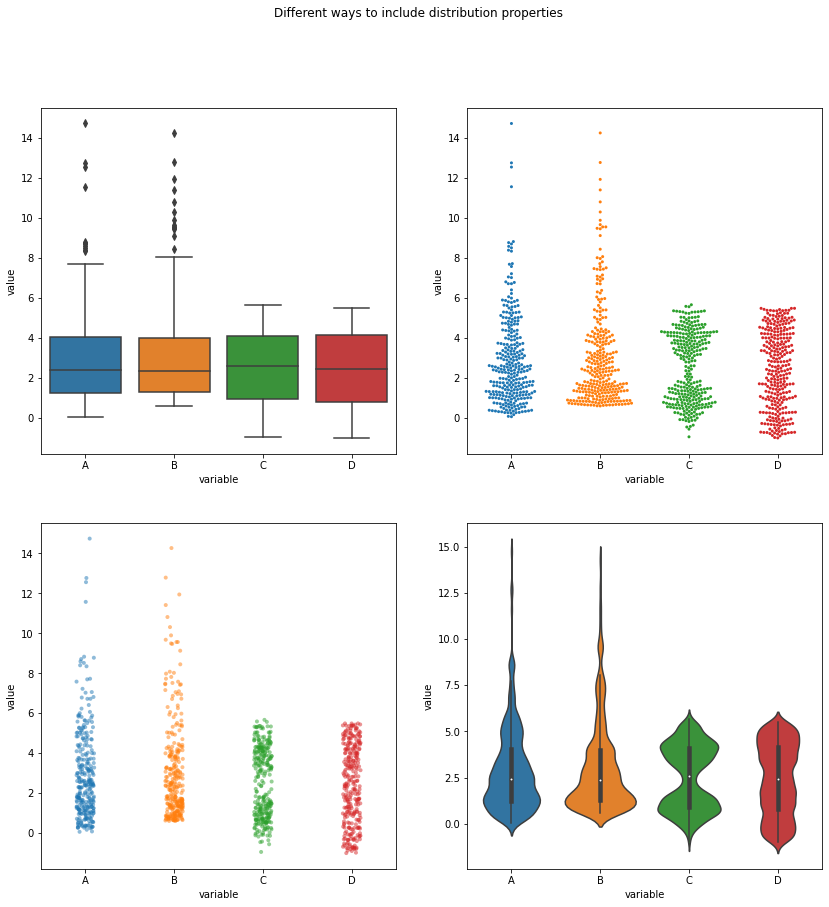

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(14, 14))

sb.boxplot(x="variable", y="value", data=pd.melt(datasets_test),
          ax=ax[0][0])

sb.stripplot(x="variable", y="value", data=pd.melt(datasets_test),
          ax=ax[1][0], alpha=0.5, size=4)

sb.swarmplot(x="variable", y="value", data=pd.melt(datasets_test),
          ax=ax[0][1], size=3)

sb.violinplot(x="variable", y="value", data=pd.melt(datasets_test),
          ax=ax[1][1], bw=.15)  # bw for "bandwidth" controls the degree of smoothing

fig.suptitle("Different ways to include distribution properties")

By utilizing these visualization techniques, we can get a comprehensive understanding of our datasets' distributions and make more informed decisions during analysis.

## Let's talk money

In real life we will come across distributions of all shapes, often non-symmetric. An even though it is considered polite in many cultures to not talk too much about our own wealth and incomes, we all probably know that income and wealth are unlikely to be narrow, symmetric distributions where most people have more or less the same, and earn more or less the same. I will leave the political debates up to you (but secretely do hope to spark some). 

To me, things like wealth and income are good topics to learn about basic statistics. First, because we all know *something* about money and to some extend care about money (even if we say otherwise). And second, because it is full of striking example of skewed distributions. In fact, let me quote Thomas Piketty here {cite}`piketty_capital_2014`:

>  **Wealth is so concentrated that a large segment of society is virtually unaware of its existence.**


Real numberson incomes in Germany, albeit already evaluated, can be found [here](https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Einkommen-Konsum-Lebensbedingungen/Einkommen-Einnahmen-Ausgaben/Publikationen/Downloads-Einkommen/einkommensverteilung-2152606139004.pdf;jsessionid=6E880CBD0BFD0E121C71BCEC21D6971B.live742?__blob=publicationFile).

For raw data requests, you can visit [this site](https://paneldata.org/).

Let's dive into our fictional, but realistic, data:

In [12]:
# Code to generate a simulated income distribution for Germany (2020)

np.random.seed(0)
income_data = np.random.gamma(4, 600, 30000).astype(int) 
income_data = np.concatenate([income_data,
                              np.random.gamma(10, 1000, 1000).astype(int),
                              np.random.randint(0, 30000, 500)])
income_data = pd.DataFrame(income_data, columns=["income"])

Text(0.5, 0, 'Net Household Income per Month in €')

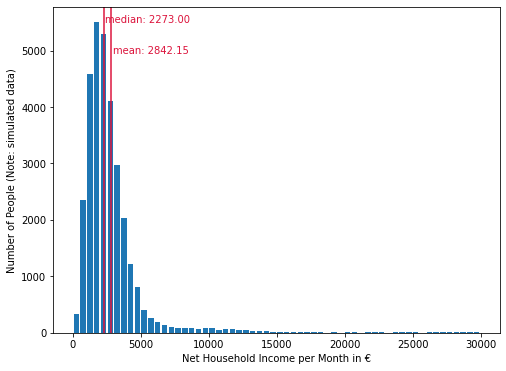

In [13]:
# The visualization will depict income ranges and their frequencies.

plot_dist(income_data["income"], 60, ["mean", "median"])
plt.ylabel("Number of People (Note: simulated data)")
plt.xlabel("Net Household Income per Month in €")

This data shows us the distribution of monthly household incomes, but we can dig deeper.

In [14]:
# Code to compute and display quantiles of the income data
income_data.quantile(q=np.arange(0, 1.1, 0.1))

,income
0.0,7.0
0.1,1069.9
0.2,1414.0
0.3,1705.0
0.4,1991.0
0.5,2273.0
0.6,2593.0
0.7,2989.0
0.8,3516.0
0.9,4483.1


We can further dissect this data by dividing it into deciles:

In [15]:
income_data["decile"] = pd.qcut(income_data['income'], q=10, labels=np.arange(10))
income_data.head()

,income,decile
0,4912,9
1,2692,6
2,5118,9
3,1257,1
4,2083,4


Visualizing median income for each decile:

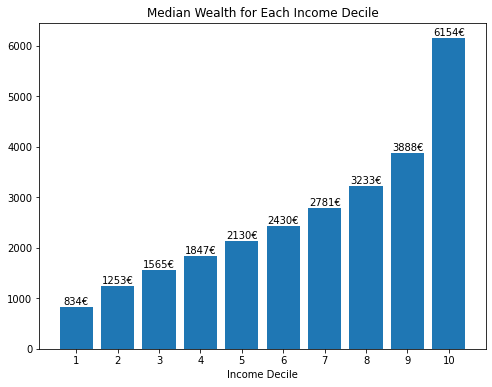

In [16]:
# Code to visualize the median income for each decile

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x=np.arange(10), height=income_data.groupby("decile").median()["income"])
for i, v in enumerate(income_data.groupby("decile").median()["income"]):
    ax.text(i, v + 50, f"{v:.0f}€", color='black', ha="center")

plt.xticks(ticks=np.arange(10), labels=np.arange(1,11), rotation=0)
plt.xlabel("Income Decile")
plt.title("Median Wealth for Each Income Decile")
plt.show()

Such a breakdown offers more insights into the income disparities.

In [17]:
# Code to determine and display the total income for each decile
income_sum = income_data.groupby("decile").sum()
income_sum["income"] *= 100/income_sum["income"].sum()
income_sum

,income
decile,
0,2.789230
1,4.418895
2,5.492008
3,6.492915
4,7.507340
5,8.548762
6,9.789732
7,11.394254
8,13.790309


This can be further visualized using a treemap:

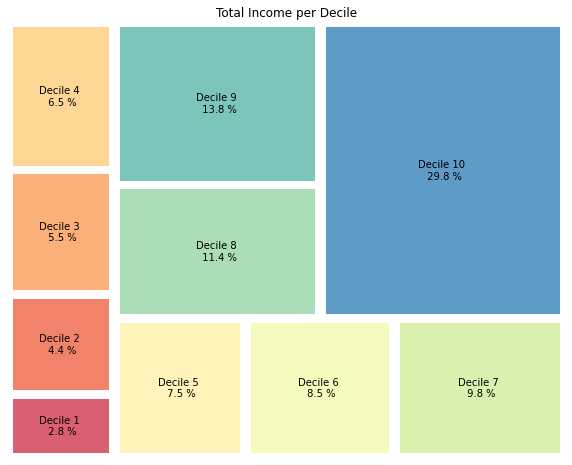

In [18]:
# Code to visualize the income distribution across deciles using a treemap

# labels
labels = [f"Decile {i+1} \n {x:.1f} %" for i, x in enumerate(income_sum["income"])]

# plot
fig, ax = plt.subplots(figsize=(10,8))
squarify.plot(sizes=income_sum['income'], label=labels, alpha=.8,
             color=sb.color_palette("Spectral", len(income_sum)), pad=2)
plt.axis('off')
plt.title("Total Income per Decile")
plt.show()


### Wealth

Typically, as the Piketty quote earlier on also said, wealth has a much more skewed distribution than income!

Here, we will again work with generated, but realistic, data.

In [19]:
# Simulating a wealth distribution

np.random.seed(0)
wealth_data = (1 - np.random.power(10, 30000))**2 * 7500000 
# Subtracting debts
wealth_data -= (np.random.randint(0, 2, size=30000) == 0) * np.random.uniform(0, 40000, size=30000)
wealth_data = wealth_data.astype(int)

wealth_data = pd.DataFrame(wealth_data, columns=["wealth"])

In [20]:
wealth_data.describe()

,wealth
count,3.000000e+04
mean,1.073513e+05
std,2.156466e+05
min,-3.999200e+04
25%,9.970000e+02
50%,2.574600e+04
75%,1.188800e+05
max,2.826167e+06


Such wealth distributions, particularly when skewed, might be challenging to interpret directly. Different visual representations can offer distinct perspectives:

([<matplotlib.axis.XTick at 0x1888d4551f0>,
 [Text(0.0, 0, '0 €'),
  Text(500000.0, 0, '500 k€'),
  Text(1000000.0, 0, '1M €'),
  Text(1500000.0, 0, '1.5M €'),
  Text(2000000.0, 0, '2M €')])

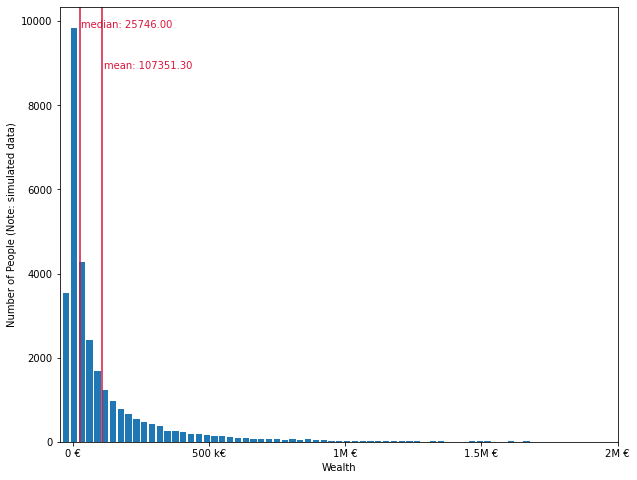

In [21]:
plot_dist(wealth_data["wealth"], 100, ["mean", "median"], figsize=(10,8))
plt.xlim(-50000, 2e6)
plt.xlabel("Wealth")
plt.ylabel("Number of People (Note: simulated data)")
plt.xticks(ticks = [0, 5e5, 1e6, 1.5e6, 2e6], labels=["0 €", "500 k€",
                                                     "1M €", "1.5M €", "2M €"])

This plot is technically OK. But is has a number of disadvantages. It is visually very centered on the left side due to the strong asymmetry in the wealth distribution. This also leads to the fact, that the *long tail*, that is all the fortunes above > 500k€ are practically impossible to read in this plot. We can try different plot types.

We will quickly see, that a **boxplot** is not making things better here:

([<matplotlib.axis.XTick at 0x1888d161160>,
 [Text(0.0, 0, '0 €'),
  Text(500000.0, 0, '500 k€'),
  Text(1000000.0, 0, '1000 k€'),
  Text(1500000.0, 0, '1500 k€'),
  Text(2000000.0, 0, '2000 k€')])

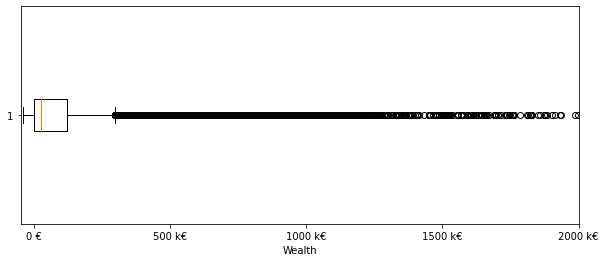

In [22]:
fig, ax = plt.subplots(figsize=(10,4))
ax.boxplot(wealth_data["wealth"], vert=False)
plt.xlim(-50000, 2e6)
plt.xlabel("Wealth")
plt.xticks(ticks = [0, 5e5, 1e6, 1.5e6, 2e6], labels=["0 €", "500 k€",
                                                     "1000 k€", "1500 k€", "2000 k€"])

A **violin plot** is not as ugly as the boxplot in this case, but it also doesn't solve our problem.

([<matplotlib.axis.XTick at 0x1888d445c70>,
 [Text(0.0, 0, '0 €'),
  Text(500000.0, 0, '500 k€'),
  Text(1000000.0, 0, '1000 k€'),
  Text(1500000.0, 0, '1500 k€'),
  Text(2000000.0, 0, '2000 k€')])

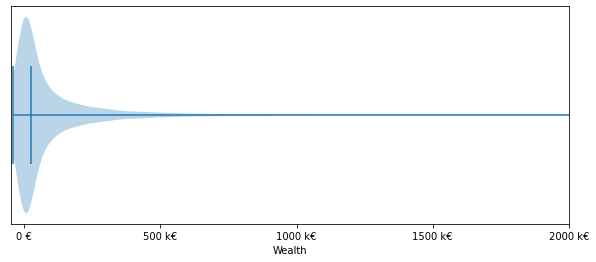

In [23]:
fig, ax = plt.subplots(figsize=(10,4))
ax.violinplot(wealth_data["wealth"], vert=False, points=300,
             showmedians=True)
ax.set(yticks=[])
plt.xlim(-50000, 2e6)
plt.xlabel("Wealth")
plt.xticks(ticks = [0, 5e5, 1e6, 1.5e6, 2e6], labels=["0 €", "500 k€",
                                                     "1000 k€", "1500 k€", "2000 k€"])

Sometimes it helps to switch from a linear to a logarithmic scale. Not in this case though:

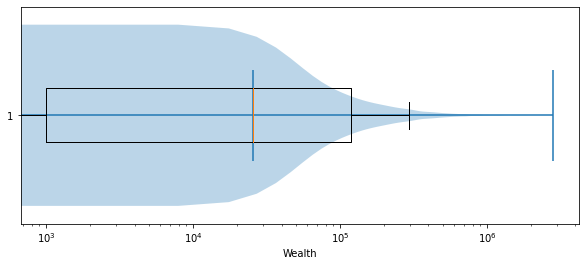

In [24]:
fig, ax = plt.subplots(figsize=(10,4))
ax.violinplot(wealth_data["wealth"], vert=False, points=300,
             showmedians=True)
ax.boxplot(wealth_data["wealth"], vert=False, showfliers=False)
plt.ylim(0.7, 1.3)
plt.xlabel("Wealth")
plt.xticks(ticks = [0, 5e5, 1e6, 1.5e6, 2e6], labels=["0 €", "500 k€",
                                                     "1000 k€", "1500 k€", "2000 k€"])
plt.xscale("log")

### Exploring Wealth Distribution: A Different Approach

Analyzing wealth distribution can be quite abstract due to the vast range of values we might encounter. Even switching to non-linear scales is not overly satisfying here. Partly also, because capital can also be <= 0 (which, unfortunately, it often is).

One effective way to dissect this vastness is by segmenting it into more digestible chunks – like deciles.

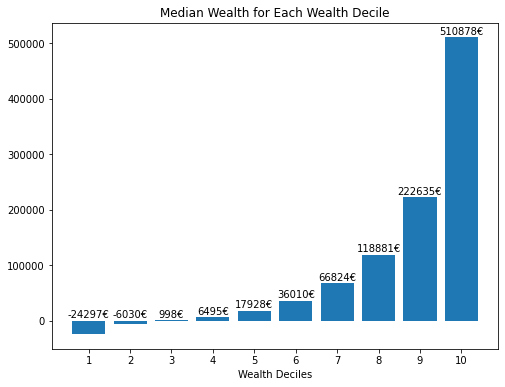

In [25]:
# Splitting the wealth data into deciles
wealth_data["decile"] = pd.qcut(wealth_data['wealth'], q=10, labels=np.arange(10))

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x=np.arange(10), height=wealth_data.groupby("decile").median()["wealth"])

# Annotating the median wealth values for each decile
for i, v in enumerate(wealth_data.groupby("decile").median()["wealth"]):
    ax.text(i, max(v, 0) + 5000, f"{v:.0f}€", color='black', ha="center")

plt.xticks(ticks=np.arange(10), labels=np.arange(1,11), rotation=0)
plt.xlabel("Wealth Deciles")
plt.title("Median Wealth for Each Wealth Decile")
plt.show()


But if we wish to amplify the impact of these insights visually, we can take a more graphical approach.

Consider the following data which provides a breakdown of wealth percentages across certain segments of the population:

In [26]:
wealth_sum = wealth_data.groupby("decile").sum()
wealth_sum["wealth"] *= 100/wealth_sum["wealth"].sum()
wealth_sum

,wealth
decile,
0,-2.337298
1,-0.576260
2,0.113087
3,0.625263
4,1.681564
5,3.404859
6,6.310448
7,11.313193
8,21.260922


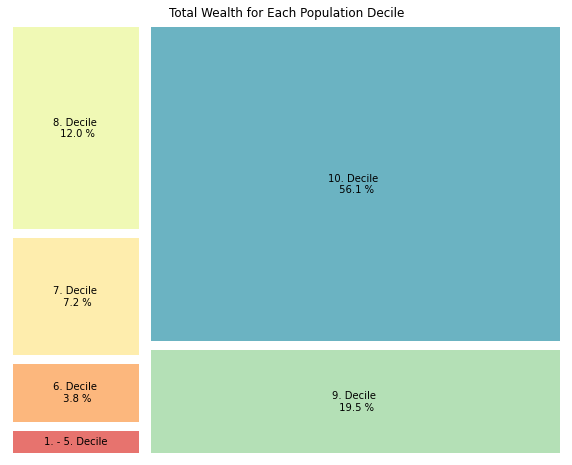

In [27]:
# Sample data representing wealth distribution across segments
wealth_sum_real = pd.DataFrame({"wealth": [1.8, 3.8, 7.2, 12., 19.5, 56.1]})

# Labeling segments for better visualization
labels = [f"{i+5}. Decile \n {x:.1f} %" for i, x in enumerate(wealth_sum_real["wealth"])]
labels[0] = "1. - 5. Decile" 

# Adjusting sizes for the visualization
sizes = wealth_sum_real['wealth']
sizes[sizes < 0] = 0.0001

# Visualizing the wealth distribution using a treemap
fig, ax = plt.subplots(figsize=(10,8))
squarify.plot(sizes=sizes, label=labels, alpha=.8,
             color=sb.color_palette("Spectral", len(wealth_sum_real)), pad=2)
plt.axis('off')
plt.title("Total Wealth for Each Population Decile")
plt.show()

This visualization provides an illustrative look at how wealth is dispersed across different segments of society. Through such visual aids, abstract numbers transform into tangible insights. And I bet they help a lot in sparking discussions on the distribution of wealth...